# Import modules

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import wine datasets from Scikit-learn built-in datasets

In [23]:
from sklearn import datasets
X,y = datasets.load_wine(return_X_y=True)

In [24]:
# split data
from sklearn.model_selection import train_test_split

seed = 123

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = seed)

# KNN

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# use pipeline
steps = [('scaler', StandardScaler()), ('knn',KNN() )]
pipeline = Pipeline(steps)

# use GridSearchCV
params_knn = {'knn__n_neighbors' : np.arange(1,20)}
cv = GridSearchCV(pipeline, param_grid=params_knn, cv=5)

cv.fit(X_train,y_train)
print('Best params : {}'.format(cv.best_params_))
print('Best score : {}'.format(cv.best_score_))

y_pred = cv.predict(X_test)
print('KNN accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred)))

Best params : {'knn__n_neighbors': 6}
Best score : 0.968
KNN accuracy : 0.93


# Decision Tree
Find the best parameters ( max_depth, max_features )

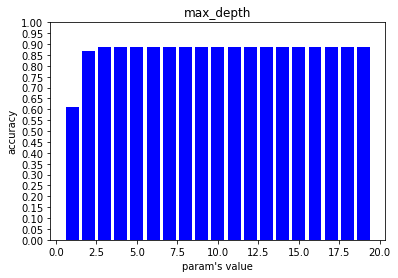

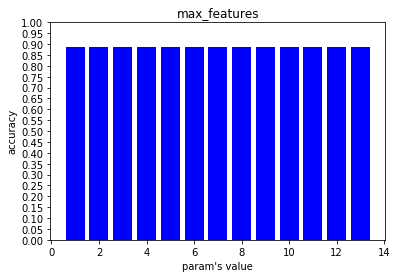

In [26]:
from sklearn.tree import DecisionTreeClassifier


for i in range(1,20):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    plt.bar(i,score, color = 'b')
    plt.title('max_depth')
    plt.xlabel('param\'s value')
    plt.ylabel('accuracy')
    plt.yticks(np.arange(0, 1.05,0.05))
plt.show()

for i in range(1,14):
    model = DecisionTreeClassifier(max_features= i)
    model.fit(X_train,y_train)
    score = accuracy_score(y_test, y_pred)
    plt.bar(i,score, color = 'b')
    plt.title('max_features')
    plt.xlabel('param\'s value')
    plt.ylabel('accuracy')
    plt.yticks(np.arange(0, 1.05,0.05))
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(max_depth = 8,max_features=13, random_state = seed)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Decision Tree accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree accuracy : 0.89


Use RandomizedSearchCV for Decision Tree

In [28]:
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth':[4,6,8,10], 'max_features':[8,10,12]}
model = DecisionTreeClassifier(random_state = seed)
rs = RandomizedSearchCV(model, param_distributions=params, cv=5,random_state = seed)

rs.fit(X_train,y_train)
print(rs.best_params_)
print(rs.best_score_)

y_pred = rs.predict(X_test)
print('Decision Tree : {:.2f}'.format(accuracy_score(y_test, y_pred)))

{'max_features': 10, 'max_depth': 6}
0.8943333333333333
Decision Tree : 0.89


# RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300,random_state=seed)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print('Random forest : {:.2f}'.format(accuracy_score(y_test, y_pred)))

Random forest : 0.98


# Adaboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth = 2,random_state = seed)

# adaboost
model = AdaBoostClassifier(base_estimator=dt, n_estimators=300, random_state = seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('AdaBoost : {:.2f}'.format(accuracy_score(y_test, y_pred)))

AdaBoost : 0.94


# Gradient boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300, max_depth=2, random_state = seed)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('Gradient boosting : {:.2f}'.format(accuracy_score(y_test, y_pred)))

Gradient boosting : 0.98


# Voting Classifier ( finalized model )

In [32]:
# Using Voting Classifier
from sklearn.metrics import confusion_matrix, classification_report

steps = [('scaler', StandardScaler()), ('knn',KNN(n_neighbors=6) )]
pipeline = Pipeline(steps)

rf = RandomForestClassifier(n_estimators=300,random_state=seed)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=300, random_state = seed)
gb = GradientBoostingClassifier(n_estimators=300, max_depth=2, random_state = seed)

classifiers = [('KNN', pipeline), ('Random forest', rf), ('Adaboost',ab),('Gradient Boosting', gb)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)
print('Voting Classifiers accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN : 0.926
Random forest : 0.981
Adaboost : 0.944
Gradient Boosting : 0.981
Voting Classifiers accuracy : 0.98
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# Save model

In [33]:
'''
import pickle
filename = 'wine_finalized_model.sav'
pickle.dump(vc, open(filename, 'wb'))
'''

# Load model and perform prediction

In [34]:
def wine_model(filename, file):
    '''load model from filename and predict file.'''
    loaded_model = pickle.load(open(filename, 'rb'))
    y_pred = loaded_model.predict(file)
    return y_pred